# Model Training Using Inputs (Pre-Processed Dataset and Labels CSV)

In [1]:
import numpy as np
import pandas as pd

X_train = pd.read_csv("trainset.csv", index_col=0)
X_test = pd.read_csv("testset.csv", index_col=0)
X_val = pd.read_csv("valset.csv", index_col=0)

y_train = X_train.label
y_test = X_test.label
y_val = X_val.label

## Perform RFECV

Fitting estimator with 46 features.
Fitting estimator with 46 features.
Fitting estimator with 46 features.
Fitting estimator with 46 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 45 features.
Fitting estimator with 45 features.
Fitting estimator with 45 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 44 features.
Fitting estimator with 44 features.
Fitting estimator with 44 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 43 features.
Fitting estimator with 43 features.
Fitting estimator with 43 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 42 features.
Fitting estimator with 42 features.
Fitting estimator with 42 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 41 features.
Fitting estimator with 41 fe

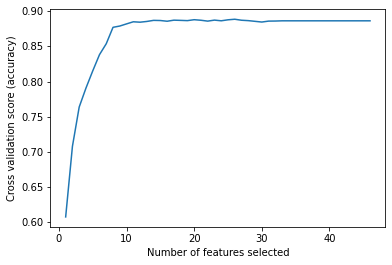

Num Features Before: 46
Num Features After: 26


In [2]:
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import math

min_features_to_select = 1

# To account for weight imbalances
scale_pos_weight = math.sqrt(y_train.value_counts().values[0]/y_train.value_counts().values[1])

# create a random forest model
clf_xgb = xgb.XGBClassifier(random_state=4262, use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight)

# Recursively eliminate features with cross validation
rfecv = RFECV(estimator=clf_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=10, step=1, min_features_to_select= min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

X_new = rfecv.transform(X_train)
print("Num Features Before:", X_train.shape[1])
print("Num Features After:", X_new.shape[1])

## Features Chosen from RFECV

In [3]:
rfecv.support_

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True])

## Hyperparameter Tuning with RandomizedSearchCV/GridSearchCV

In [4]:
X_train = X_train.iloc[:, rfecv.support_]

In [6]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import math

# To account for weight imbalances
scale_pos_weight = math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1])

clf = xgb.XGBClassifier(random_state=4262, colsample_bytree = 0.8, colsample_bynode = 0.8, colsample_bylevel = 0.8, use_label_encoder = False,
                        eval_metric = "logloss", objective = "binary:logistic", scale_pos_weight = scale_pos_weight, n_estimators = 200)

params = {
 "learning_rate" : [0.03, 0.05, 0.08],
 "max_depth" : [5, 7, 10],
 "min_child_weight" : [ 1, 3, 5 ],
 "gamma": [0.5, 1],
 "alpha": [0, 0.5],
 "subsample": [0.8, 1],
 "n_estimators":[300, 500, 700]
}

rscv_model = RandomizedSearchCV(clf, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=10)
gscv_model = GridSearchCV(clf, param_grid =params, verbose =10, cv=5, scoring = 'average_precision', n_jobs=-1)

In [7]:
# Uncomment if you want to run the gridsearch
# rscv_model.fit(X_train, y_train)
# gscv_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 2/5; 1/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8
[CV 1/5; 1/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8
[CV 3/5; 1/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8
[CV 4/5; 1/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8
[CV 5/5; 1/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8
[CV 1/5; 2/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1
[CV 3/5; 2/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1
[CV 2/5; 2/648] START alpha=0, gamma=0.5, learning_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5; 41/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=700, subsample=0.8
[CV 1/5; 40/648] END alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, subsample=1;, score=0.394 total time= 3.4min
[CV 3/5; 41/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=700, subsample=0.8
[CV 5/5; 39/648] END alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.439 total time= 3.5min
[CV 4/5; 41/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=700, subsample=0.8
[CV 2/5; 40/648] END alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, subsample=1;, score=0.433 total time= 3.2min
[CV 5/5; 41/648] START alpha=0, gamma=0.5, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=700, subsample=0.8
[CV 3/5;

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=0.8, colsample_bytree=0.8,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     scale_pos_weight=4.531988617758267,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=None

In [5]:
gscv_model.best_estimator_

NameError: name 'gscv_model' is not defined

In [6]:
clf_xgb = xgb.XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree',
              colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=700, n_jobs=8,
              num_parallel_tree=1, random_state=4262, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=4.531988617758267, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

clf_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree',
              colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=8,
              num_parallel_tree=1, random_state=4262, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=4.531988617758267, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [7]:
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score

y_pred = clf_xgb.predict(X_test.iloc[:, rfecv.support_])
y_pred_proba = clf_xgb.predict_proba(X_test.iloc[:, rfecv.support_])
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
ap = average_precision_score(y_test, y_pred_proba[:,1])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", auc_score)
print("PR-ROC:", ap)

Accuracy: 0.9522893735422889
AUC-ROC: 0.8911076179517633
PR-ROC: 0.40746910963294025


## Generating Files For Submission

### Reading Dataset1 and Dataset2

In [49]:
ds1 = pd.read_csv("ds1_df_ggact.csv", index_col=0)
ds2 = pd.read_csv("ds2_df_ggact.csv", index_col=0)

ds1_output = ds1.copy()[["transcript_id", "transcript_pos"]]
ds2_output = ds2.copy()[["transcript_id", "transcript_pos"]]

In [50]:
ds1.rename(columns={"nucleo_seq.1":"ggact_present"}, inplace=True)
ds2.rename(columns={"nucleo_seq.1":"ggact_present"}, inplace=True)

In [51]:
ds1.drop(columns=["nucleo_seq", "transcript_id", "transcript_pos"], inplace=True)
ds2.drop(columns=["nucleo_seq", "transcript_id", "transcript_pos"], inplace=True)

### Selecting features from RFECV

In [52]:
ds1 = ds1.iloc[:, rfecv.support_]
ds2 = ds2.iloc[:, rfecv.support_]

In [53]:
def output(dataset, model, df):
    
    # Get probabilities of 1
    score = pd.DataFrame(model.predict_proba(dataset)[:, 1], columns=["score"])
    output = pd.concat([df, score], axis=1)
    output.rename(columns={"transcript_pos":"transcript_position"}, inplace=True)
    return output
    

In [54]:
output(ds1, clf_xgb, ds1_output).to_csv("ds1_xgb_final_ggact.csv", index=False)
output(ds2, clf_xgb, ds2_output).to_csv("ds2_xgb_final_ggact.csv", index=False)